In [37]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

# dictionaries for case 1
args_1 = {
     "Number_of_Excitons": 2,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 0.5 / 3.6749322175665e-2,
     "exciton_energy_ev" : 0.5 / 3.6749322175665e-2,
     "exciton_boson_coupling_ev" : 0.05 / 3.6749322175665e-2,
     "exciton_transition_dipole_magnitude_au" : 1.0,
     "exciton_ground_state_dipole_magnitude_au" : 0.0,
     "exciton_excited_state_dipole_magnitude_au" : 0.0
}

# from this paper https://journals.aps.org/prb/pdf/10.1103/PhysRevB.92.125432
qd_args = {
     "Number_of_Excitons": 1,
     "number_of_boson_levels": 3,
     "boson_energy_ev": 2.05,
     "exciton_energy_ev" : 2.05,
     "exciton_boson_coupling_ev" : 0.01,
     "boson_spontaneous_emission_rate_mev" : 0.0, #0.15e3,
     "exciton_spontaneous_emission_rate_mev" : 190e-6,
     "exciton_dephasing_rate_mev" : 2,
     "time_step_au" : 0.5
    
}

sf = wptherml.SpectrumFactory()

# instantiate cases
test_1 = sf.spectrum_factory("Spin-Boson", qd_args)



Energy Eigenvalues in atomic units are
[0.03766806 0.11263667 0.11337166 0.18782056 0.18885999 0.26367639]
Energy eigenvalues in eV are
[1.025      3.065      3.085      5.11085786 5.13914214 7.175     ]


In [38]:
bos_ket_0 = np.array([[1],[0],[0]])
spin_ket_1 = np.array([[0],[1]])
print(bos_ket_0)
print(spin_ket_1)
composite_ket = np.kron(bos_ket_0, spin_ket_1)

composite_bra = composite_ket.T.conj()

composite_rho = composite_ket @ composite_bra
print(composite_rho)

[[1]
 [0]
 [0]]
[[0]
 [1]]
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [39]:
#test_1.build_rho_from_eigenstate(1)
test_1.rho = np.copy(composite_rho)
t = [0]
gs = []
lp = []
up = []
ds = []
gs.append(np.real(test_1.rho[0,0]))
lp.append(np.real(test_1.rho[1,1]))
ds.append(np.real(test_1.rho[2,2]))
up.append(np.real(test_1.rho[3,3]))

for i in range(50000):
    t.append(test_1.time_step_au * i)
    test_1.rk4_update_on_rho()
    gs.append(np.real(test_1.rho[0,0]))
    lp.append(np.real(test_1.rho[1,1]))
    ds.append(np.real(test_1.rho[2,2]))
    up.append(np.real(test_1.rho[3,3]))
    


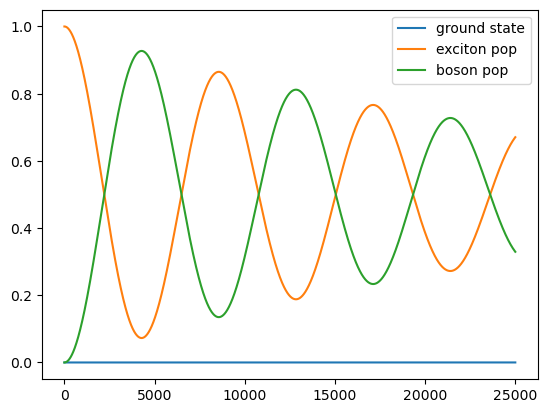

In [40]:
plt.plot(t, gs, label="ground state")
plt.plot(t, lp, label="exciton pop")
plt.plot(t, ds, label="boson pop")
#plt.plot(t, up, label="upper polariton")
plt.legend()
plt.show()